In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [3]:
data = load_iris()

In [4]:
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [5]:
df = pd.DataFrame(data.data, columns=data.feature_names)

In [6]:
df['target'] = data.target

In [7]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [8]:
X = df.iloc[:, :-1]
y = df['target']


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [10]:
classifier = DecisionTreeClassifier(criterion='entropy', splitter='best')

In [11]:
classifier

DecisionTreeClassifier(criterion='entropy')

In [12]:
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

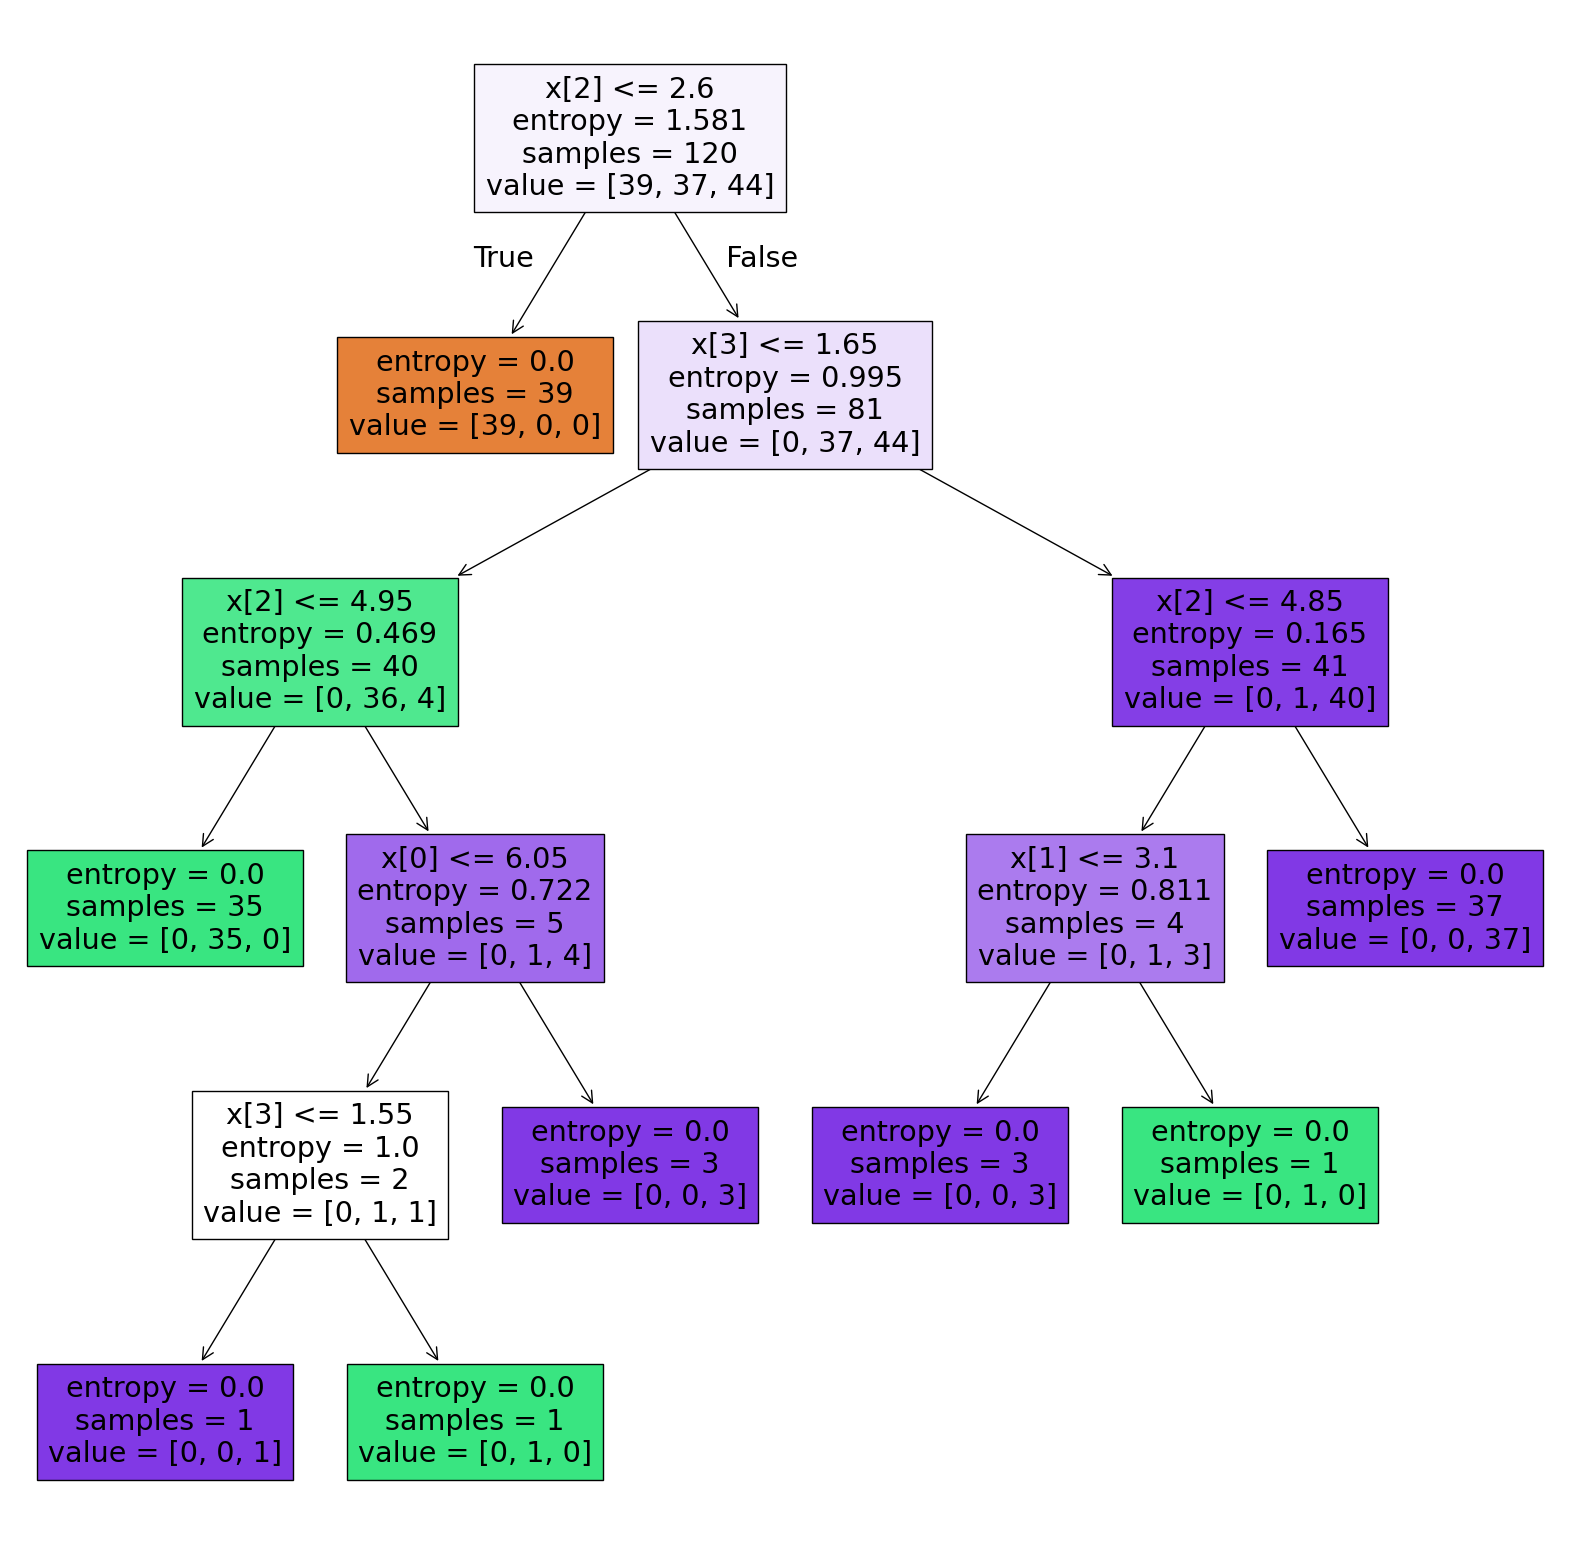

In [13]:
plt.figure(figsize=(20,20 ))
tree.plot_tree(classifier, filled=True)
plt.show()

In [14]:
# postruning 
classifier = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=3)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [54]:
y_pred1 =  classifier.predict(X_test) 
print(confusion_matrix(y_test, y_pred1))
print(accuracy_score(y_test, y_pred1))
print(classification_report(y_test, y_pred1))

[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
0.9666666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



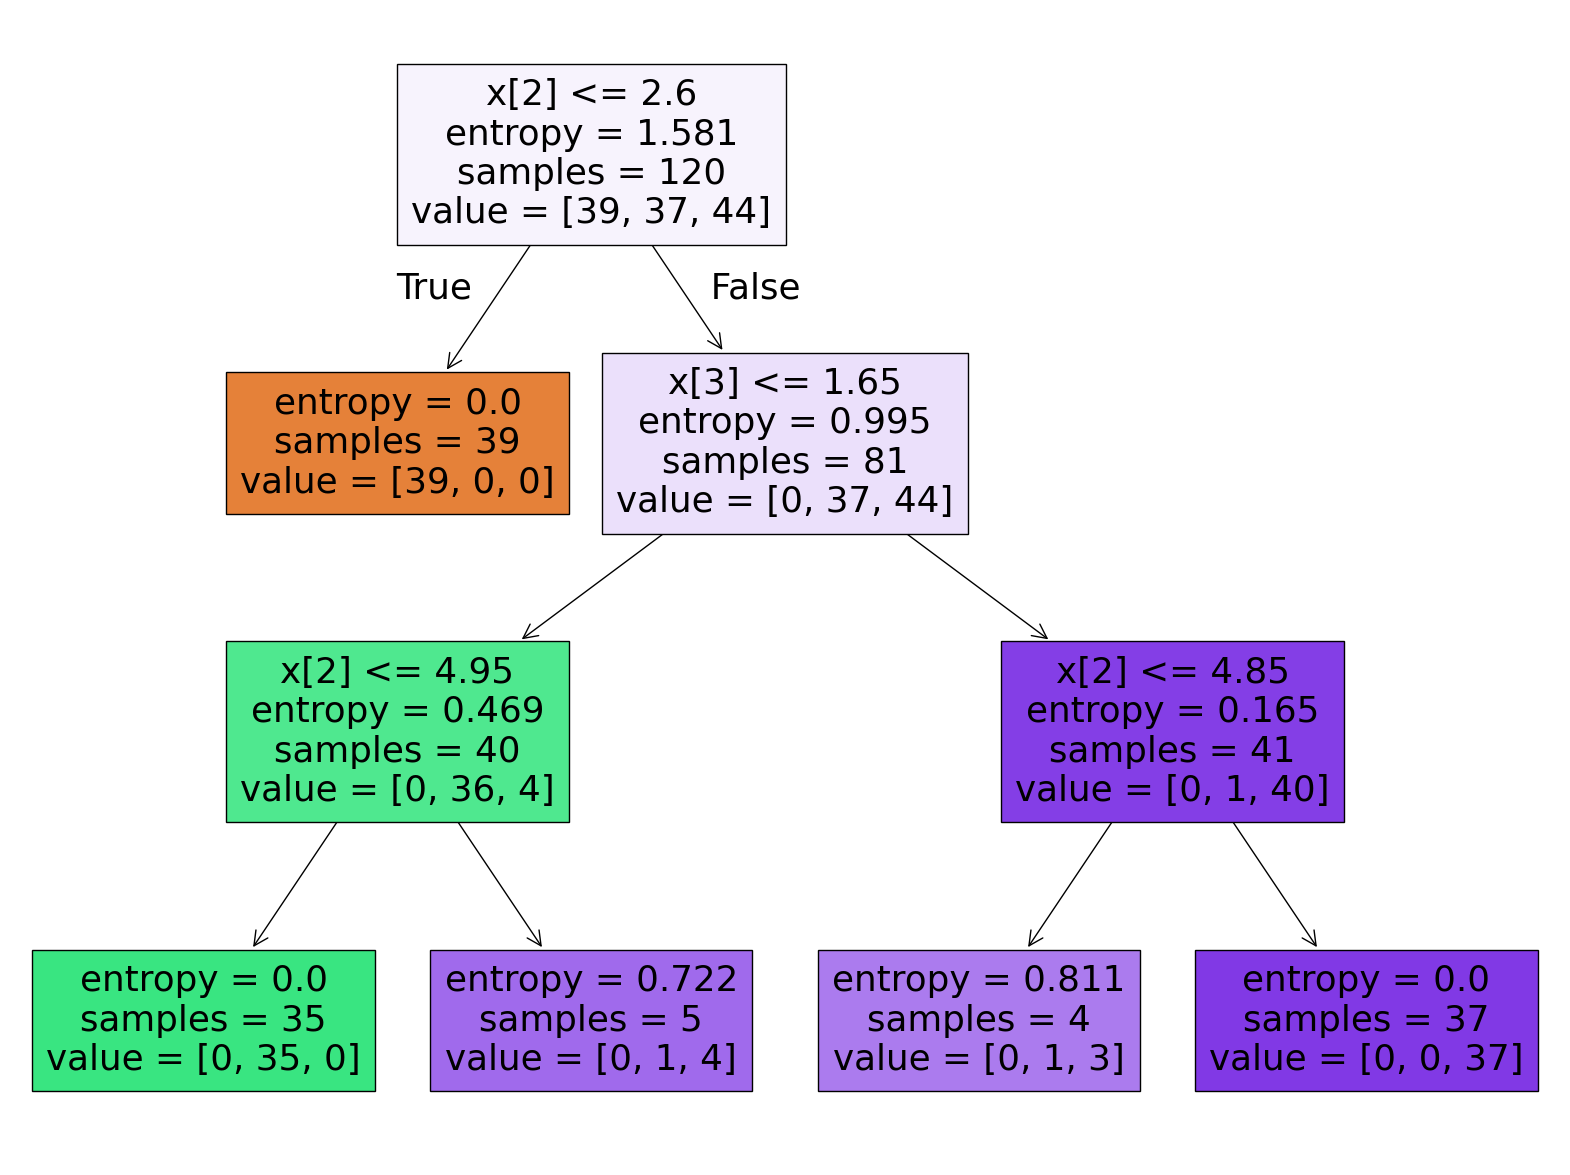

In [15]:
plt.figure(figsize=(20,15 ))
tree.plot_tree(classifier, filled=True)
plt.show()

In [24]:
# pretruning
param={
  'criterion':['gini', 'entropy', 'log_loss'],
  'splitter':['best', 'random'],
  'max_depth':[1,2,3,4,5,6],
  'max_features':['sqrt', 'log2']
}

In [25]:
from sklearn.model_selection import GridSearchCV

In [26]:
clf=DecisionTreeClassifier()
model = GridSearchCV(clf, param_grid=param, cv=5, scoring ='accuracy')

In [27]:
model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6],
                         'max_features': ['sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [28]:
model.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [34]:
model1 = DecisionTreeClassifier(criterion='entropy',max_depth=3, max_features='sqrt',splitter='best')

In [35]:
model1.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features='sqrt')

In [44]:
y_pred = model1.predict(X_test)
y_prop_pred = model1.predict_proba(X_test)
y_prop_pred

array([[1.   , 0.   , 0.   ],
       [0.   , 1.   , 0.   ],
       [0.   , 1.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [0.   , 0.025, 0.975],
       [0.   , 1.   , 0.   ],
       [0.   , 0.025, 0.975],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [0.   , 0.025, 0.975],
       [0.   , 1.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [0.   , 0.025, 0.975],
       [0.   , 1.   , 0.   ],
       [0.   , 1.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [0.   , 1.   , 0.   ],
       [0.   , 1.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [0.   , 1.   , 0.   ],
       [0.   , 1.   , 0.   ],
       [0.   , 0.025, 0.975],
       [1.   , 0.   , 0.   ],
       [0.   , 0.025, 0.975],
       [0.   , 1.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [0.   , 1.   , 0.   ],
       [0.   , 0.025, 0.975]])

In [43]:
y_pred

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2])

In [47]:
from sklearn.metrics import  confusion_matrix, accuracy_score, classification_report

In [52]:
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
0.9666666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

